# *Multi-Prophet* para séries temporais

A biblioteca *Facebook Prophet* é bastante conhecida pelo seu bom desempenho na previsão de séries temporais, principalmente, quando elas possuem sazonalidade. Essa ferramenta também é útil, pois o número de comando e funções usados para gerar um modelo, porém mesmo com poucas linhas de comando, caso seja necessário criar mais de um modelo para séries temporais diferentes, esse trabalho pode ficar muito repetitivo. Realizar um procedimento no *Facebook Prophet* para várias séries temporais pode tornar-se maçante, por isso uma nova ferramenta foi desenvolvida que visa agilizar esse processo.

A biblioteca *Multi-Prophet* permite aplicar o *Prophet* para cada uma dessas séries temporais e criar um modelo diferente para cada uma delas com poucas linhas de comando.

Nesse projeto mostrei como usar essa biblioteca para gerar previsões de quatro série temporais com dados climáticos da cidade de Delhi na Índia. Os dados abrangem 4 anos (de 2013 a 2017) com periodicidade. Os dados estão divididos em treino e teste; a base de dados de treino será aplicada na biblioteca e gerarei as previsões para o número de períodos da base de teste e, por fim, irei usar algumas métricas de avaliação para comparar os resultados. 

## Instalando a bibliteca *Multi-Prophet*

In [1]:
pip install multi-prophet

## Importando as bibliotecas

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multi_prophet import MultiProphet
from sklearn.metrics import r2_score
plt.style.use('ggplot')

## Importando a base de dados

In [58]:
treino = pd.read_csv('DailyDelhiClimateTrain.csv')
teste = pd.read_csv('DailyDelhiClimateTest.csv')

Assim como na biblioteca *Prophet* é necessário renomear as colunas das bases de dados com *ds* para a coluna data e *y* para as colunas que são as séries temporais, no caso, renomeadas como *y1*, *y2*, *y3* e *y4*. 

In [59]:
treino = treino.rename(columns={'date':'ds', 'meantemp':'y1','humidity':'y2','wind_speed':'y3','meanpressure':'y4'})
teste = teste.rename(columns={'date':'ds', 'meantemp':'y1','humidity':'y2','wind_speed':'y3','meanpressure':'y4'})

Irei excluir uma linha que não é de interesse.

In [60]:
treino = treino.drop([1461], axis=0)

Vou criar uma série temporal que abrange os dados de treino e teste.

In [61]:
frames = [treino, teste]
serie = pd.concat(frames)
serie.reset_index(inplace=True)
serie = serie.drop('index', axis=1)

Gerando um gráficos das séries de temperatura, humidade e velocidade do vento.

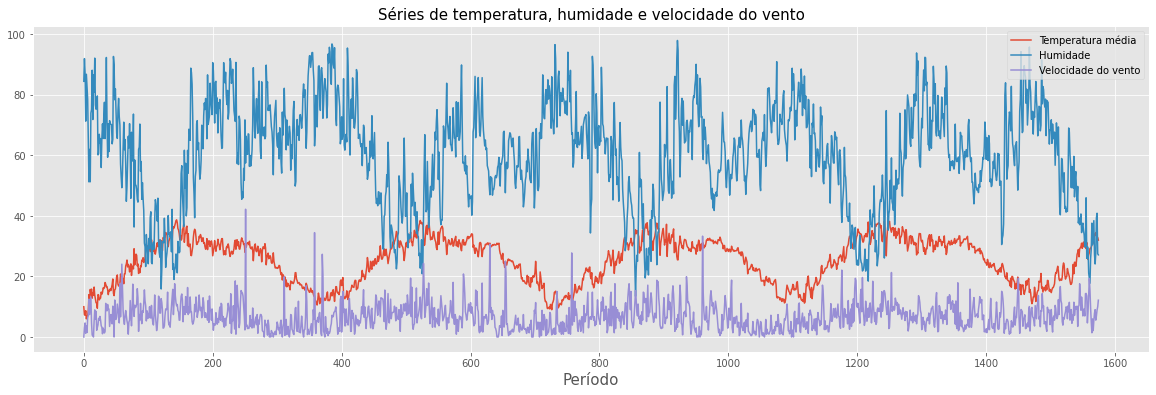

In [140]:
serie[['y1','y2','y3']].plot(figsize=(20,6))
plt.legend(['Temperatura média','Humidade','Velocidade do vento'])
plt.title('Séries de temperatura, humidade e velocidade do vento', size=15)
plt.xlabel('Período', size=15)
plt.ylabel('');

Série de pressão média.

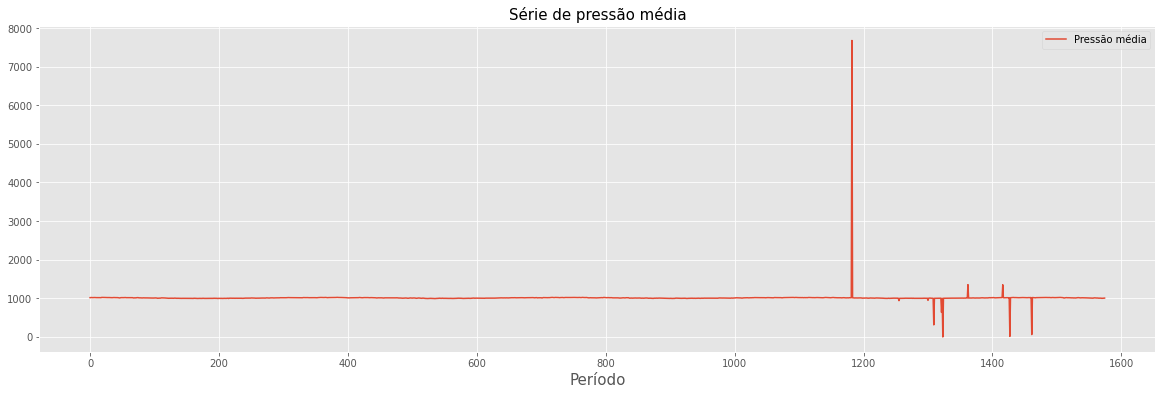

In [141]:
serie['y4'].plot(figsize=(20,6))
plt.legend(['Pressão média'])
plt.title('Série de pressão média', size=15)
plt.xlabel('Período', size=15)
plt.ylabel('');

## Aplicando o *Multi-Prophet*

Assim como na biblioteca *Prophet* o procedimento é similar: instancia-se o objeto *Multi-Prophet* com as colunas, o forma de crescimento da série e o tipo de sazonalidade usada.

In [154]:
modelo = MultiProphet(columns=["y1","y2","y3","y4"], growth="linear", weekly_seasonality = True, seasonality_mode = 'multiplicative')
modelo.fit(treino)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


E agora gera-se as previsões para as quatro séries temporais.

{'y1': <Figure size 720x432 with 1 Axes>,
 'y2': <Figure size 720x432 with 1 Axes>,
 'y3': <Figure size 720x432 with 1 Axes>,
 'y4': <Figure size 720x432 with 1 Axes>}

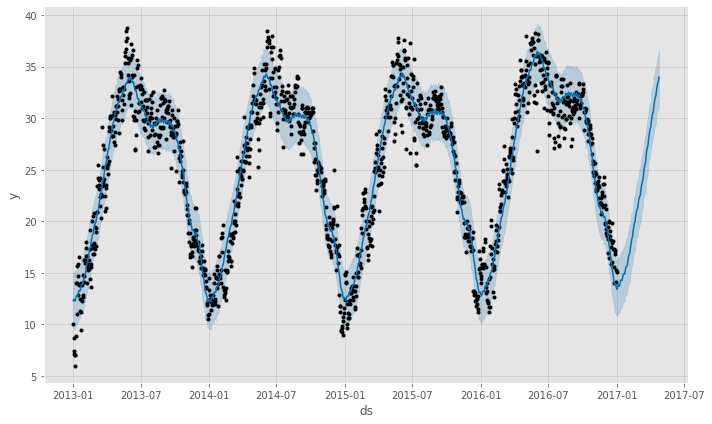

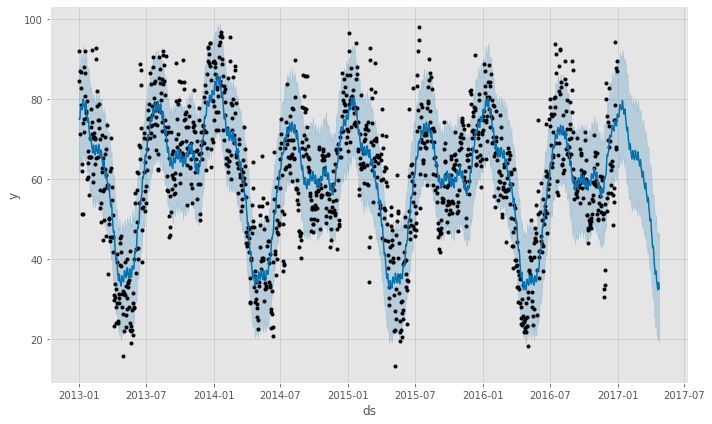

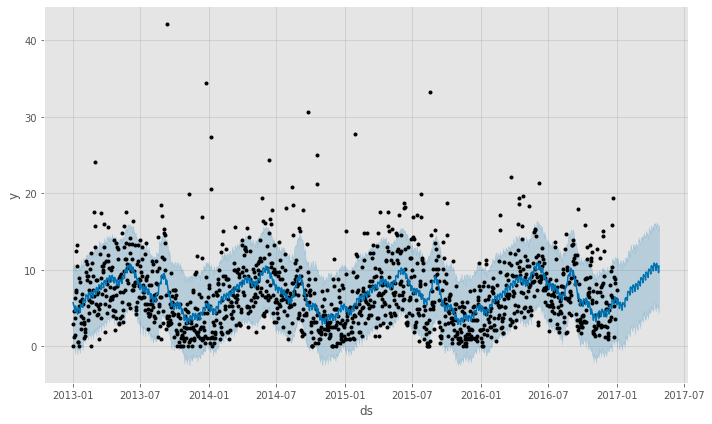

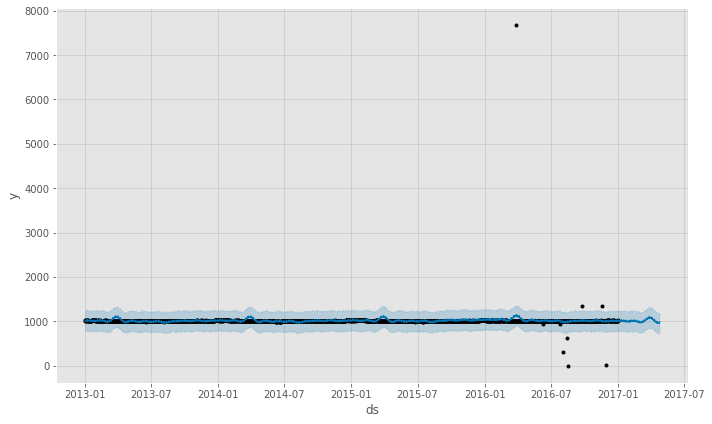

In [155]:
futuro = modelo.make_future_dataframe(periods=114)
previsao = modelo.predict(futuro)
modelo.plot(previsao)

A irei mudar o índice das previsões e em seguida plotá-las com os dados de teste.

In [156]:
teste2 = teste
teste2.index = serie[1461:].index

previsao1 = previsao['y1'][1461:]
previsao1.index = serie[1461:].index

previsao2 = previsao['y2'][1461:]
previsao2.index = serie[1461:].index

previsao3 = previsao['y3'][1461:]
previsao3.index = serie[1461:].index

previsao4 = previsao['y4'][1461:]
previsao4.index = serie[1461:].index

## Gráfico da série de temperatura média

Abaixo o gráfico com a série de treino, teste e as previsões.

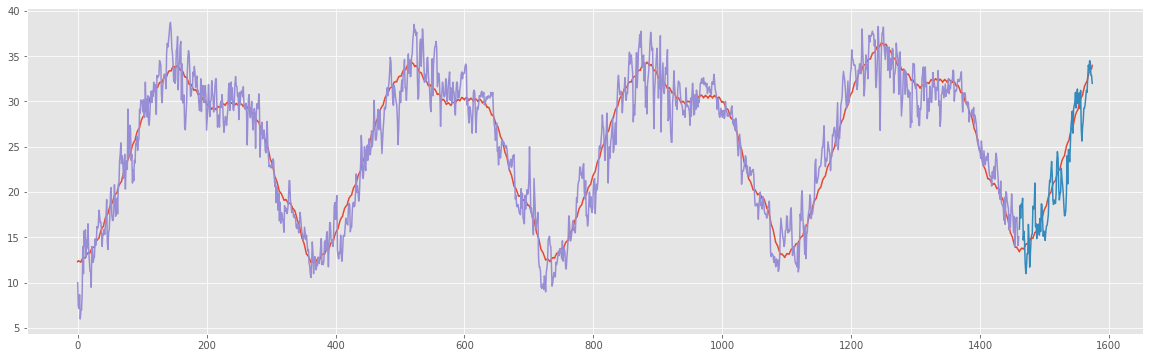

In [181]:
#previsao1['yhat'].plot(figsize=(20,3))
previsao['y1']['yhat'].plot(figsize=(20,6));
teste2['y1'].plot()
treino['y1'].plot()
;

Plotando apenas os dados de teste e as previsões: obviamente as previsões não vão acertar 100%, por isso é necessário considerar um intervalo com limites superior e inferior.

Abaixo vemos que boa parte dos valores reais ficam dentro do intervalo de confiança da previsão.

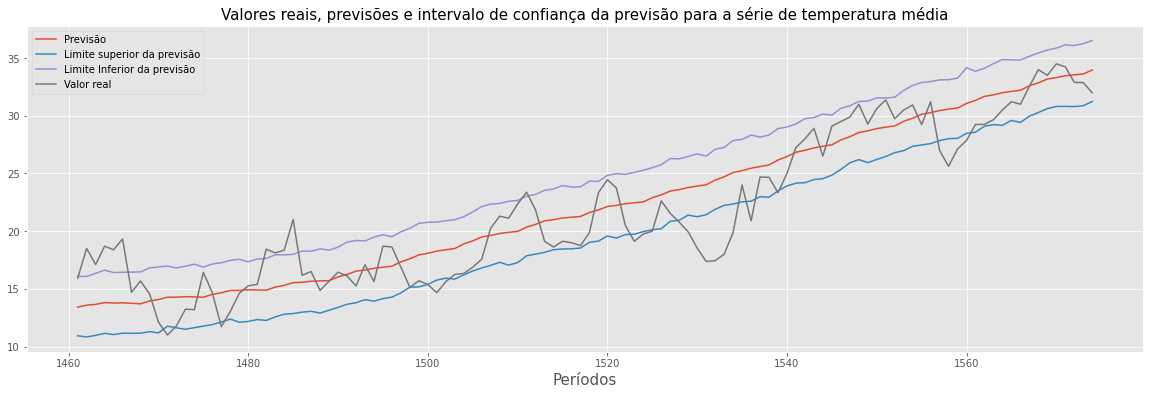

In [174]:
previsao1[['yhat','yhat_lower','yhat_upper']].plot(figsize=(20,6))
teste2['y1'].plot()
plt.legend(['Previsão','Limite superior da previsão',
            'Limite Inferior da previsão','Valor real'])
plt.title('Valores reais, previsões e intervalo de confiança da previsão para a série de temperatura média', size=15)
plt.xlabel('Períodos', size=15);

## Gráfico da série de humidade

Base de treino, teste e previsões para a série de humidade.

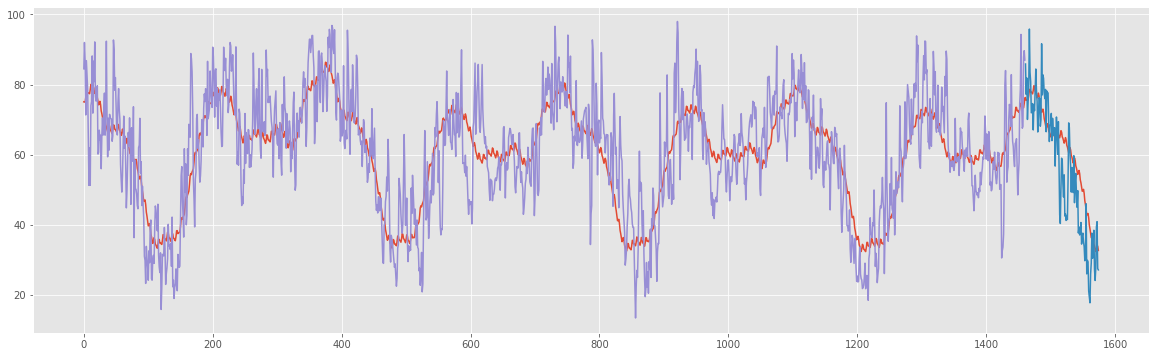

In [182]:
previsao['y2']['yhat'].plot(figsize=(20,6));
teste2['y2'].plot()
treino['y2'].plot();

Previsão, intervalo de confiança e valores reais.

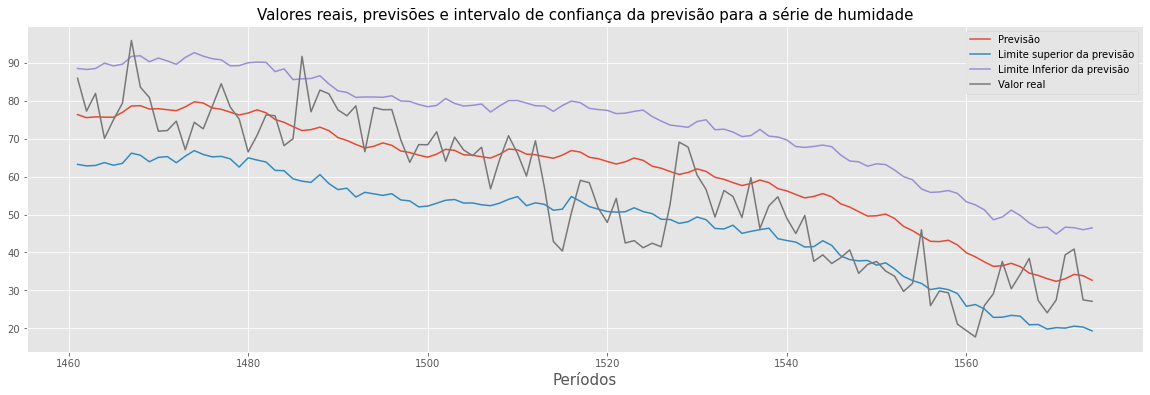

In [175]:
previsao2[['yhat','yhat_lower','yhat_upper']].plot(figsize=(20,6))
teste2['y2'].plot()
plt.legend(['Previsão','Limite superior da previsão',
            'Limite Inferior da previsão','Valor real'])
plt.title('Valores reais, previsões e intervalo de confiança da previsão para a série de humidade', size=15)
plt.xlabel('Períodos', size=15);

## Gráfico de velocidade do vento

Dados de treino, teste e previsões.

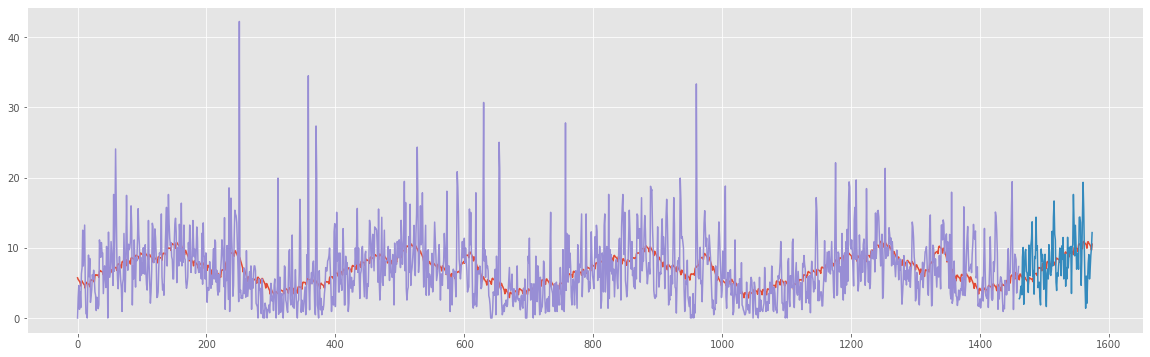

In [183]:
previsao['y3']['yhat'].plot(figsize=(20,6));
teste2['y3'].plot()
treino['y3'].plot();

Previsão, intervalo de confiança e valores reais.

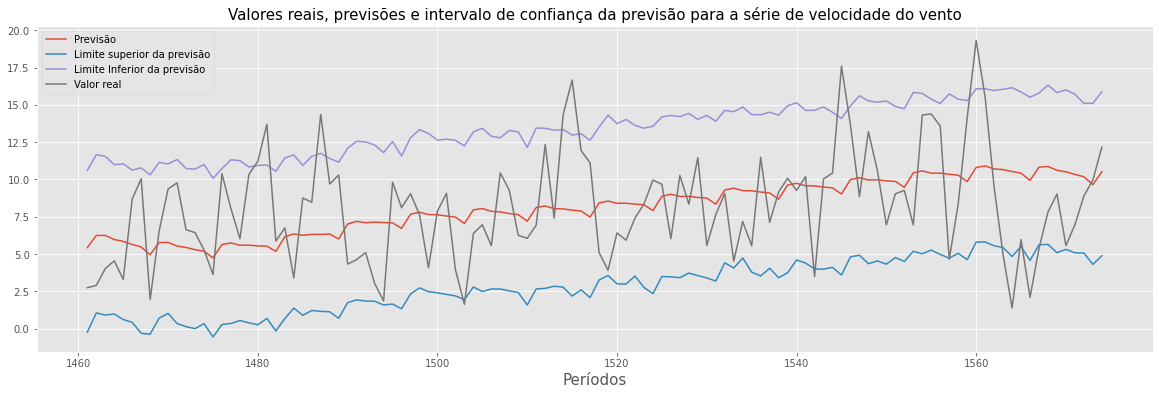

In [176]:
previsao3[['yhat','yhat_lower','yhat_upper']].plot(figsize=(20,6))
teste2['y3'].plot()
plt.legend(['Previsão','Limite superior da previsão',
            'Limite Inferior da previsão','Valor real'])
plt.title('Valores reais, previsões e intervalo de confiança da previsão para a série de velocidade do vento', size=15)
plt.xlabel('Períodos', size=15);

## Gráfico de pressão média

Gráfico com a série de pressão média modelada (com as previsões), base de treino e a base de teste.


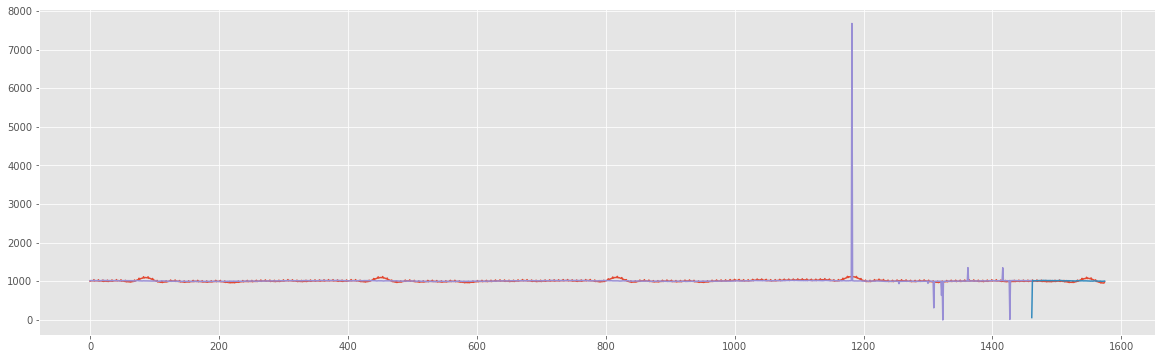

In [184]:
previsao['y4']['yhat'].plot(figsize=(20,6))
teste2['y4'].plot()
treino['y4'].plot();

Dados reais, previsões e o intervalo de confiança da previsão.

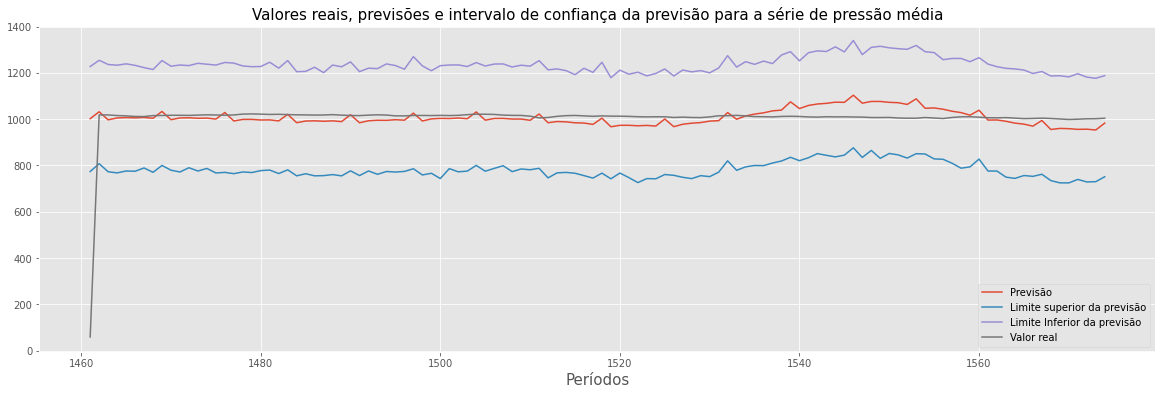

In [177]:
previsao4[['yhat','yhat_lower','yhat_upper']].plot(figsize=(20,6))
teste2['y4'].plot()
plt.legend(['Previsão','Limite superior da previsão',
            'Limite Inferior da previsão','Valor real'])
plt.title('Valores reais, previsões e intervalo de confiança da previsão para a série de pressão média', size=15)
plt.xlabel('Períodos', size=15);

## Gráficos dos componentes das séries


{'y1': <Figure size 648x648 with 3 Axes>,
 'y2': <Figure size 648x648 with 3 Axes>,
 'y3': <Figure size 648x648 with 3 Axes>,
 'y4': <Figure size 648x648 with 3 Axes>}

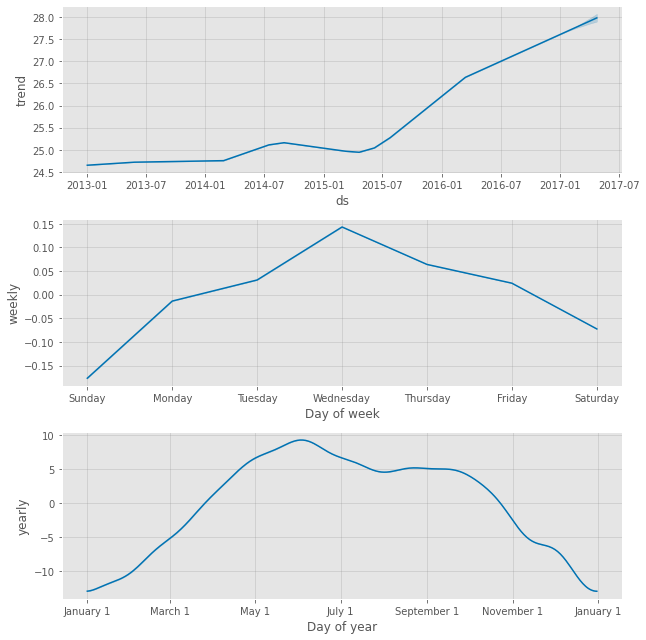

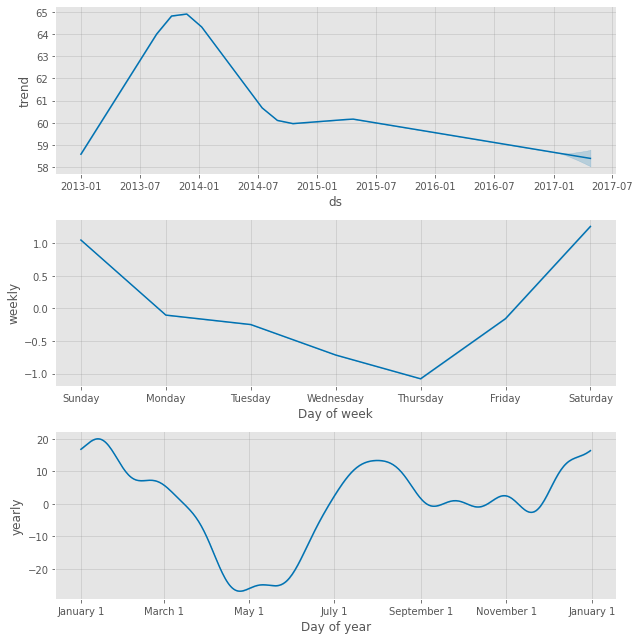

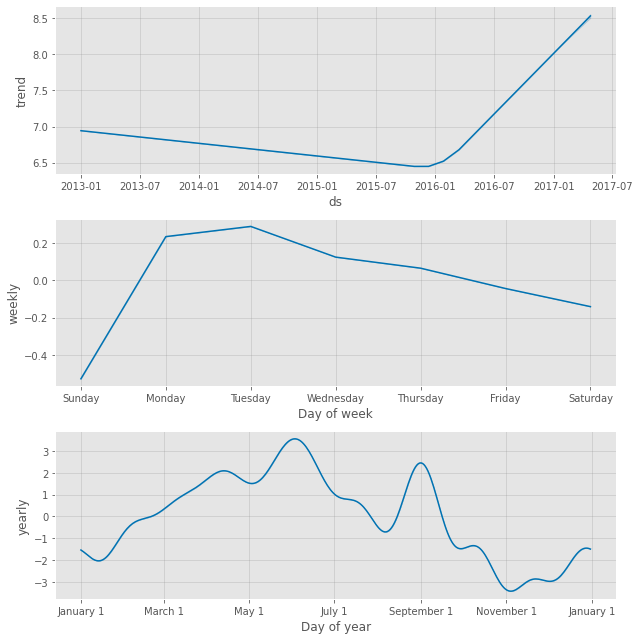

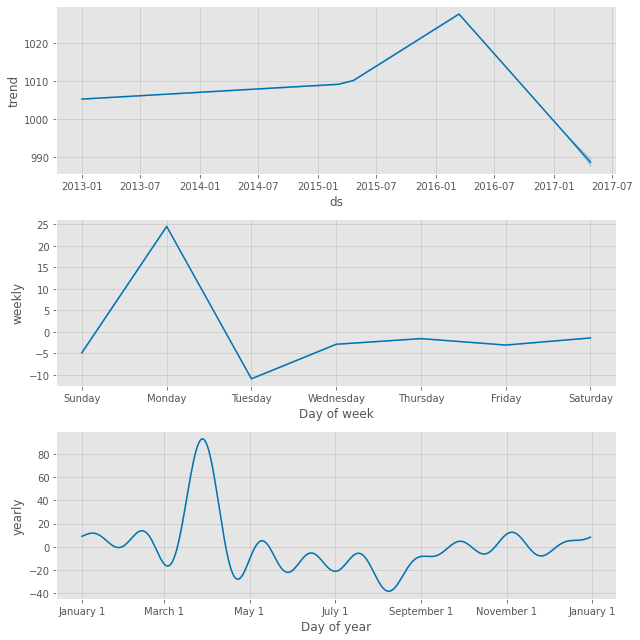

In [133]:
modelo.plot_components(previsao)

## Acessando os dados gerados pelos modelos

Como foram criadas quatro previsões para quatro séries temporais, dentro do objeto *previsao* há quatro bases de dados com todos os valores dos componentes e para acessá-los basta especificar o nome da coluna da série que deseja-se acessar como abaixo.

Valores para a série de temperatura média (*y1*).

In [185]:
previsao['y1'].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,24.762185,9.751575,15.035697,24.762185,24.762185,-0.502532,-0.502532,-0.502532,0.001097,0.001097,0.001097,-0.503628,-0.503628,-0.503628,0.0,0.0,0.0,12.318399
1,2013-01-02,24.763025,9.791256,15.138092,24.763025,24.763025,-0.498075,-0.498075,-0.498075,0.005473,0.005473,0.005473,-0.503548,-0.503548,-0.503548,0.0,0.0,0.0,12.429180
2,2013-01-03,24.763866,9.697318,14.927321,24.763866,24.763866,-0.500401,-0.500401,-0.500401,0.002504,0.002504,0.002504,-0.502905,-0.502905,-0.502905,0.0,0.0,0.0,12.371997
3,2013-01-04,24.764707,9.433908,15.040645,24.764707,24.764707,-0.500634,-0.500634,-0.500634,0.001128,0.001128,0.001128,-0.501763,-0.501763,-0.501763,0.0,0.0,0.0,12.366644
4,2013-01-05,24.765548,9.689435,14.748602,24.765548,24.765548,-0.502846,-0.502846,-0.502846,-0.002658,-0.002658,-0.002658,-0.500188,-0.500188,-0.500188,0.0,0.0,0.0,12.312293


Valores para a série de humidade (*y2*).

In [187]:
previsao['y2'].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,59.005420,62.061868,87.810287,59.005420,59.005420,0.272379,0.272379,0.272379,-0.004294,-0.004294,-0.004294,0.276672,0.276672,0.276672,0.0,0.0,0.0,75.077231
1,2013-01-02,59.029057,61.715853,88.349357,59.029057,59.029057,0.270514,0.270514,0.270514,-0.011867,-0.011867,-0.011867,0.282381,0.282381,0.282381,0.0,0.0,0.0,74.997262
2,2013-01-03,59.052694,62.403288,87.723614,59.052694,59.052694,0.270300,0.270300,0.270300,-0.017989,-0.017989,-0.017989,0.288288,0.288288,0.288288,0.0,0.0,0.0,75.014618
3,2013-01-04,59.076331,63.758347,89.299653,59.076331,59.076331,0.292409,0.292409,0.292409,-0.001878,-0.001878,-0.001878,0.294287,0.294287,0.294287,0.0,0.0,0.0,76.350807
4,2013-01-05,59.099968,65.357638,91.576205,59.099968,59.099968,0.321334,0.321334,0.321334,0.021076,0.021076,0.021076,0.300258,0.300258,0.300258,0.0,0.0,0.0,78.090787


Valores para a série de velocidade do vento (*y3*).

In [188]:
previsao['y3'].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,6.948429,0.481124,10.447304,6.948429,6.948429,-0.177162,-0.177162,-0.177162,0.043278,0.043278,0.043278,-0.220440,-0.220440,-0.220440,0.0,0.0,0.0,5.717433
1,2013-01-02,6.948008,0.258768,10.732012,6.948008,6.948008,-0.211407,-0.211407,-0.211407,0.016829,0.016829,0.016829,-0.228236,-0.228236,-0.228236,0.0,0.0,0.0,5.479149
2,2013-01-03,6.947587,0.454895,10.801732,6.947587,6.947587,-0.227387,-0.227387,-0.227387,0.009529,0.009529,0.009529,-0.236916,-0.236916,-0.236916,0.0,0.0,0.0,5.367794
3,2013-01-04,6.947166,-0.093076,10.187826,6.947166,6.947166,-0.253028,-0.253028,-0.253028,-0.006810,-0.006810,-0.006810,-0.246217,-0.246217,-0.246217,0.0,0.0,0.0,5.189341
4,2013-01-05,6.946745,-0.440255,10.459594,6.946745,6.946745,-0.275585,-0.275585,-0.275585,-0.019722,-0.019722,-0.019722,-0.255863,-0.255863,-0.255863,0.0,0.0,0.0,5.032325


Valores para a série de pressão média (*y4*).

In [189]:
previsao['y4'].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,1004.473890,769.823301,1234.904819,1004.473890,1004.473890,-0.001809,-0.001809,-0.001809,-0.010808,-0.010808,-0.010808,0.008999,0.008999,0.008999,0.0,0.0,0.0,1002.656524
1,2013-01-02,1004.478688,764.638984,1253.306068,1004.478688,1004.478688,0.006648,0.006648,0.006648,-0.002900,-0.002900,-0.002900,0.009549,0.009549,0.009549,0.0,0.0,0.0,1011.156766
2,2013-01-03,1004.483486,793.190976,1239.547471,1004.483486,1004.483486,0.008454,0.008454,0.008454,-0.001625,-0.001625,-0.001625,0.010079,0.010079,0.010079,0.0,0.0,0.0,1012.975890
3,2013-01-04,1004.488285,788.393935,1252.600380,1004.488285,1004.488285,0.007493,0.007493,0.007493,-0.003077,-0.003077,-0.003077,0.010570,0.010570,0.010570,0.0,0.0,0.0,1012.014970
4,2013-01-05,1004.493083,814.088626,1259.741714,1004.493083,1004.493083,0.009544,0.009544,0.009544,-0.001455,-0.001455,-0.001455,0.010999,0.010999,0.010999,0.0,0.0,0.0,1014.079666


## Conclusão

A *Multi Prophet*, assim como seu *primo* mais conhecido, é uma ferramenta poderosa para previsão de séries temporais e permite criar modelos para várias séries temporais diferentes e seguindo a mesma premissa de ser simples e de fácil entendimento. Esse projeto foi apenas um exemplo e essa biblioteca possui mais funcionalidades que podem ser exploradas por mim mais a frente.